In [1]:
import xgboost as xgb
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [2]:
from xgboost import XGBRegressor 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from time import time

data = load_boston()
X = data.data
y = data.target
/0.
#mean_squared_error(ytest,reg.predict(Xtest))#7.466827353555599
#reg.feature_importances_

In [3]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=420)

reg = XGBRegressor(n_estimators=100).fit(Xtrain,ytrain)
reg.predict(Xtest)
reg.score(Xtest,ytest)

0.9197580267581366

In [6]:
reg = XGBRegressor(n_estimators=100)
cross_val_score(reg,Xtrain,ytrain,cv=5).mean()#0.8017863029875325
cross_val_score(reg,Xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()
#-16.041115480238048

-16.041115480238048

In [7]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())
rfr = RandomForestRegressor(n_estimators=100)
cross_val_score(rfr,Xtrain,ytrain,cv=5).mean()#0.808027038609981
cross_val_score(rfr,Xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()
#-16.81343218575453

-17.271620439356134

In [9]:
lr = LogisticRegression()
#cross_val_score(lr,Xtrain,ytrain,cv=5).mean()
cross_val_score(lr,Xtrain,ytrain,cv=5).mean()


/jxy8/jxy/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/jxy8/jxy/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cross_val_score(lr,Xtrain,ytrain,cv=5).mean()

0.6835070597278082

In [11]:
reg = XGBRegressor(n_estimators=10,silent=False)
cross_val_score(reg,Xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-92.67865836936579

In [4]:
 def plot_learning(estimator,title,X,y,
                  ax=None,
                  ylim=None,
                  cv=None,
                  n_jobs=None):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,
                                                         shuffle=True,
                                                         n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.plot(train_sizes,np.mean(train_scores,axis=1),'o-',
           color='r',label="Training score")
    ax.plot(train_sizes,np.mean(test_scores,axis=1),'o-',
           color='b',label="Test Score")
    ax.legend(loc="best")
    return ax

In [5]:
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores = learning_curve(XGBRegressor(n_estimators=100,random_state=420),X,y,shuffle=True,n_jobs=1)
train_scores#(5, 3)
train_sizes#array([ 33, 109, 185, 261, 337])
test_scores#(5, 3)


/jxy8/jxy/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([[ 0.6848732 , -0.03932698,  0.09147315],
       [ 0.78493635,  0.35786391,  0.25160673],
       [ 0.83757062,  0.57514474,  0.29129576],
       [ 0.84827969,  0.67876724,  0.28595654],
       [ 0.82576416,  0.6704853 ,  0.33403185]])

/jxy8/jxy/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


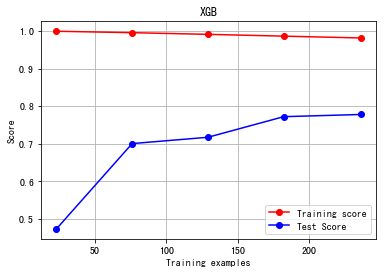

In [6]:
cv = KFold(n_splits=5,shuffle = True,random_state=42)
plot_learning(XGBRegressor(n_estimators=100,random_state=420),
             "XGB",Xtrain,ytrain,ax=None,cv=cv)
plt.show()

# n_estimators

660 0.8046775284172915


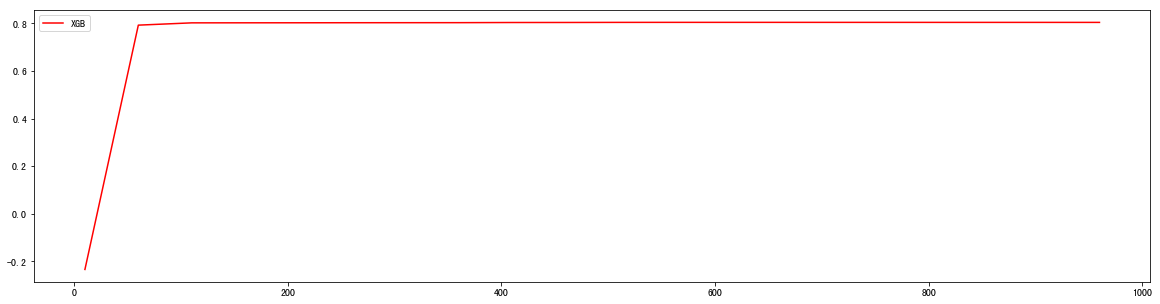

In [36]:
axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBRegressor(n_estimators=i,random_state=420)
    rs.append(cross_val_score(reg,Xtrain,ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c='r',label='XGB')
plt.legend()
plt.show()

在机器学习中，我们用来衡量模型在未知数据上的准确率 的指标，叫做泛化误差（Genelization error）。一个集成模型(f)在未知数据集(D)上的泛化误差 ，由方差 (var)，偏差(bais)和噪声(ε)共同决定。

其中偏差就是训练集上的拟合程度决定，方差是模型的稳定性决定，噪音是不可控的。而泛化误差越小，模型就越理想

650 0.80476050359201 0.01053673846018678
50 0.7857724708830981 0.009072727885598212
150 0.8032842414878519 0.009747694343514357 0.04844478399052411


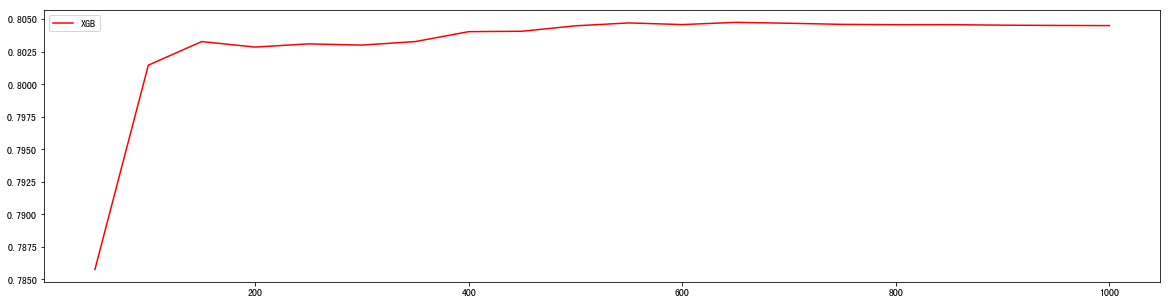

In [10]:
axisx = range(50,1050,50)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBRegressor(n_estimators=i,random_state=420)
    cvresult = cross_val_score(reg,Xtrain,ytrain,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1-cvresult.mean())**2 + cvresult.var())
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c='r',label='XGB')
plt.legend()
plt.show()

180 0.8038787848970184 0.00959321570484315
180 0.8038787848970184 0.00959321570484315
180 0.8038787848970184 0.00959321570484315 0.04805674671831314


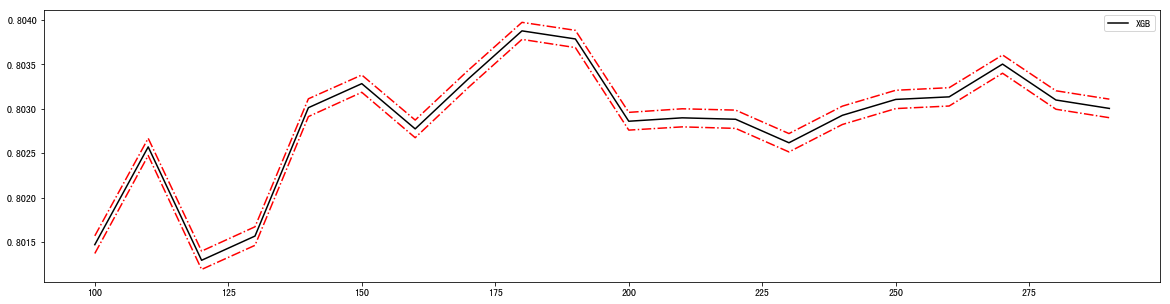

In [11]:
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBRegressor(n_estimators=i,random_state=420)
    cvresult = cross_val_score(reg,Xtrain,ytrain,cv=cv)
    
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())

print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])

print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))

print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
#添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

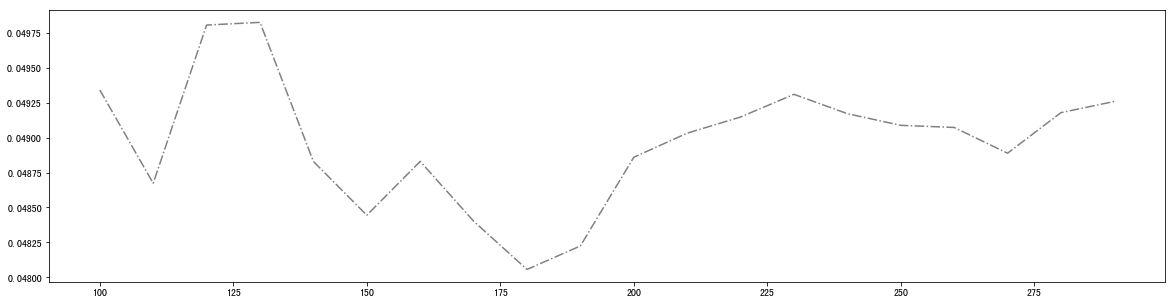

In [12]:
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()

numpy.ndarray

R2分数：

R2，也就是R-square

具体见https://blog.csdn.net/einsam0/article/details/81703301
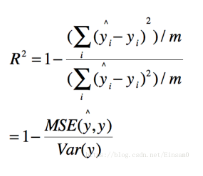

# subsample   

在sklearn中，我们使用参数subsample来控制我们的随机抽样。在xgb和sklearn中，这个参数都默认为1且不能取到 0，这说明我们无法控制模型是否进行随机有放回抽样，只能控制抽样抽出来的样本量大概是多少
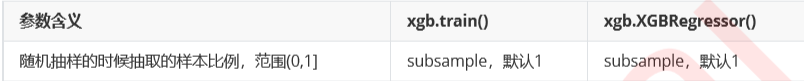
在梯度提升树中，每构建一个评估器，都让模型更加集中于数据集中容易被判错的那些样本。

首先我们有一个巨大的数据集，在建第一棵树时，我们对数据进行初次又放回抽样，然后建模。建模完毕后，我们对 模型进行一个评估，然后将模型预测错误的样本反馈给我们的数据集，一次迭代就算完成。紧接着，我们要建立第二 棵决策树，于是开始进行第二次又放回抽样。但这次有放回抽样，和初次的随机有放回抽样就不同了，在这次的抽样 中，我们加大了被第一棵树判断错误的样本的权重。也就是说，被第一棵树判断错误的样本，更有可能被我们抽中。 

基于这个有权重的训练集来建模，我们新建的决策树就会更加倾向于这些权重更大的，很容易被判错的样本。建模完 毕之后，我们又将判错的样本反馈给原始数据集。下一次迭代的时候，被判错的样本的权重会更大，新的模型会更加 倾向于很难被判断的这些样本。如此反复迭代，越后面建的树，越是之前的树们判错样本上的专家，越专注于攻克那 些之前的树们不擅长的数据。对于一个样本而言，它被预测错误的次数越多，被加大权重的次数也就越多。我们相 信，只要弱分类器足够强大，随着模型整体不断在被判错的样本上发力，这些样本会渐渐被判断正确。如此就一定程 度上实现了我们每新建一棵树模型的效果都会提升的目标。


0.7368421052631579 0.837609040251761


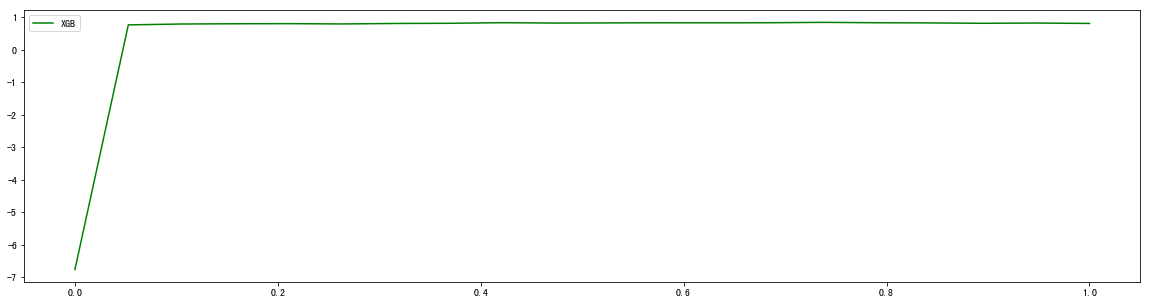

In [17]:
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    reg = XGBRegressor(n_estimators=180,subsample=i,random_state=420)
    rs.append(cross_val_score(reg,Xtrain,ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c='g',label="XGB")
plt.legend()
plt.show()

0.65 0.8302530801197368 0.008708816667924316
0.7999999999999999 0.8277414964661117 0.007159903723250457
0.7999999999999999 0.8277414964661117 0.007159903723250457 0.036832895762985055


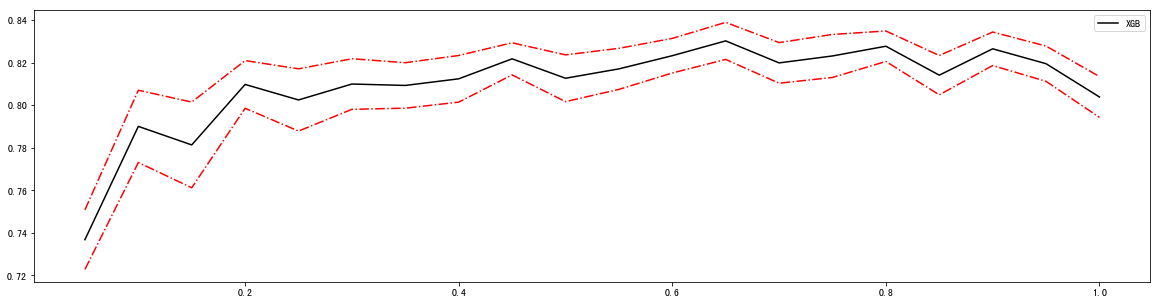

In [7]:
#细化
axisx = np.linspace(0.05,1,20)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBRegressor(n_estimators=180,subsample=i,random_state=420)
    cvresult = cross_val_score(reg,Xtrain,ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

0.7708333333333334 0.833489187182165 0.005575077682875093
0.7708333333333334 0.833489187182165 0.005575077682875093
0.7708333333333334 0.833489187182165 0.005575077682875093 0.033300928468131166


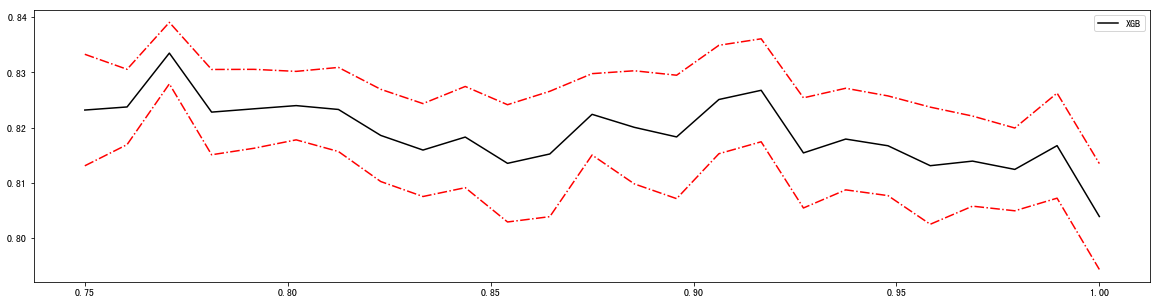

In [10]:
axisx = np.linspace(0.75,1,25)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBRegressor(n_estimators=180,subsample=i,random_state=420)
    cvresult = cross_val_score(reg,Xtrain,ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [12]:
reg = XGBRegressor(n_estimators=180,subsample=0.770833,random_state=420).fit(Xtrain,ytrain)
reg.score(Xtest,ytest)
mean_squared_error(reg.predict(Xtest),ytest)

7.821523502888769

# eta 
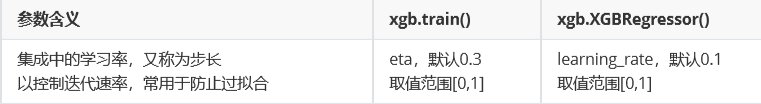

In [15]:
def regassess(reg,Xtrain,ytrain,cv,scoring=["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i],
                                    cross_val_score(reg,
                                                   Xtrain,ytrain,cv=cv,
                                                    scoring=scoring[i]).mean()))
        score.append(cross_val_score(reg,Xtrain,ytrain,cv=cv,scoring=scoring[i]).mean())
    return score


In [18]:
regassess(reg,Xtrain,ytrain,cv,scoring=["r2","neg_mean_squared_error"])


r2:0.83
neg_mean_squared_error:-11.59


[0.8334891871821647, -11.58581178178049]

In [19]:
regassess(reg,Xtrain,ytrain,cv,scoring=["r2","neg_mean_squared_error"],show=False)

[0.8334891871821647, -11.58581178178049]

In [20]:
from time import time
import datetime
for i in [0,0.2,0.5,1]:
    time0 = time()
    reg = XGBRegressor(n_estimators=180,random_state=420,learning_rate=i)
    print("learning rate = {}".format(i))
    regassess(reg,Xtrain,ytrain,cv,scoring=["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning rate = 0
r2:-6.76
neg_mean_squared_error:-567.55
00:01:159408
	
learning rate = 0.2
r2:0.81
neg_mean_squared_error:-13.32
00:01:579945
	
learning rate = 0.5
r2:0.81
neg_mean_squared_error:-13.24
00:01:723701
	
learning rate = 1
r2:0.72
neg_mean_squared_error:-19.11
00:01:452976
	


0.55 0.8125604372670463


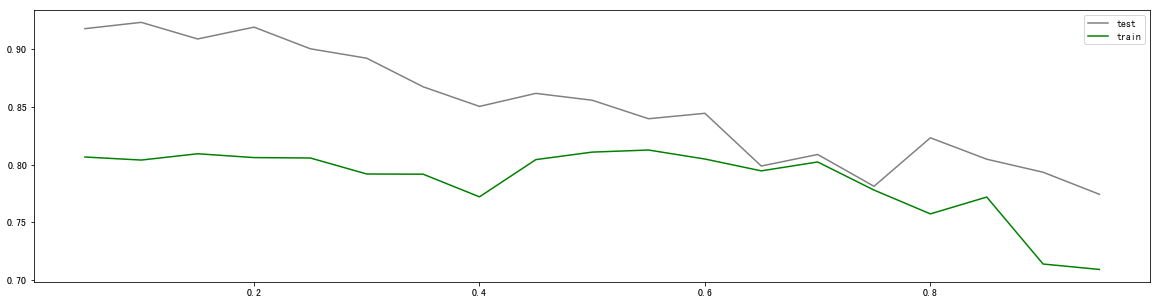

In [21]:
axisx = np.arange(0.05,1,0.05)
rs = []
te = []
for i in axisx:
    reg = XGBRegressor(n_estimators=180,random_state=420,learning_rate=i)
    score = regassess(reg,Xtrain,ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)
    test = reg.fit(Xtrain,ytrain).score(Xtest,ytest)
    rs.append(score[0])
    te.append(test)
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,te,c="gray",label="test")
plt.plot(axisx,rs,c="green",label="train")
plt.legend()
plt.show()

# booster
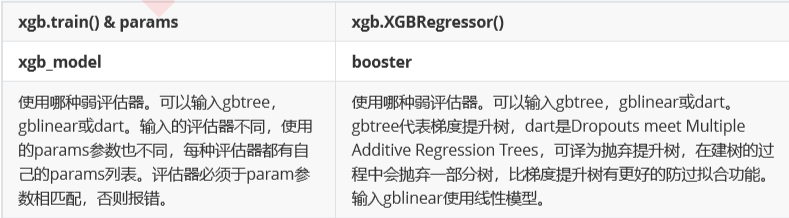

In [25]:
for booster in ["gbtree","gblinear","dart"]:
    reg = XGBRegressor(n_estimators=180,
                       random_state=420,
                       learning_rate=0.1,
                       booster=booster).fit(Xtrain,ytrain)
    print(booster)
    print(reg.score(Xtrain,ytrain))
    print(reg.score(Xtest,ytest))
    print("\t")

gbtree
0.98696581554947
0.9231068620728082
	
gblinear
0.5927707794745154
0.6286510307485139
	
dart
0.9869658130005374
0.923106843149575
	


# objective
如果回归预测，那我们可以选择调节后的均方误差RMSE作为我们的损失函数。

如果分类预测，那我们可以选择错误率error或者对数损失log_loss
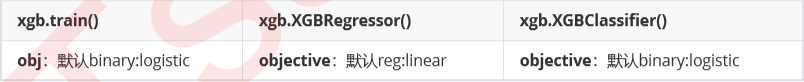

注意：分类型的目标函数导入回归类中会直接报错。
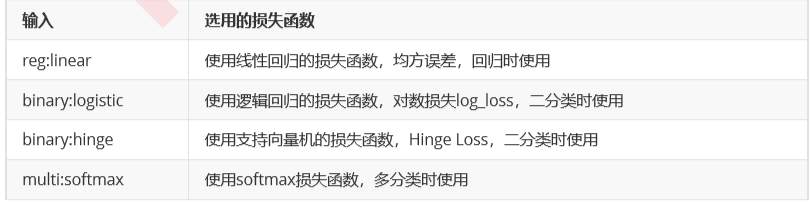

In [29]:
reg = XGBRegressor(n_estimators=180,random_state=420,learning_rate=0.1,).fit(Xtrain,ytrain)
print("{}".format(reg.score(Xtest,ytest)))
mean_squared_error(ytest,reg.predict(Xtest))

0.9231068620728082


7.155205217161047

In [34]:
import xgboost as xgb
dtrain = xgb.DMatrix(Xtrain,ytrain)
dtest = xgb.DMatrix(Xtest,ytest)

dtrain
param = {'silent':False,'objective':'reg:linear','eta':0.1}
num_round = 180
bst = xgb.train(param,dtrain,num_round)
from sklearn.metrics import r2_score
print("{}".format(r2_score(ytest,bst.predict(dtest))))
mean_squared_error(ytest,bst.predict(dtest))

0.9260984298390122


6.87682821415069

# alpha lambda
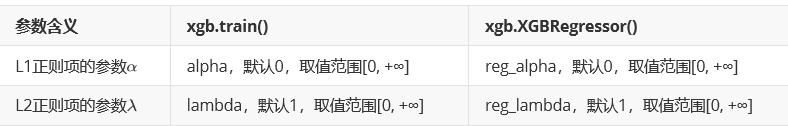
从XGB的默认参数来看，我们优先选择的是L2正则化。


In [ ]:
from sklearn.model_selection import GridSearchCV


# gamma
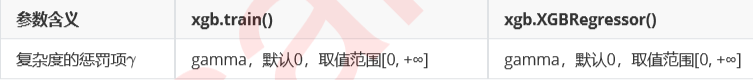
实践证明， gamma是对梯度提升树影响最大的参数之一。在XGB 中，我们规定，只要结构分数之差Gain是大于0的，即只要目标函数还能够继续减小，我们就允许树继续进行分枝

 因此被定义为，在树的叶节点上进行进一步分枝所 需的最小目标函数减少量

3.1 0.8082740708121546 0.009289472054282844
2.5500000000000003 0.8076923943232783 0.00871821372693272
2.5500000000000003 0.8076923943232783 0.00871821372693272 0.04570042892804619


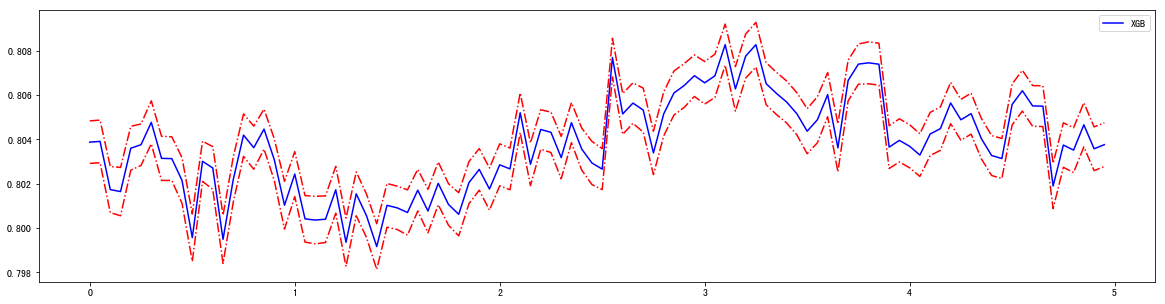

In [41]:
axisx = np.arange(0,5,0.05)
rs = []
var = []
ge = []

for i in axisx:
    reg = XGBRegressor(n_estimators=180,gamma=i,random_state=420)
    cvresult = cross_val_score(reg,Xtrain,ytrain,cv=cv)
    
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())

print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.1

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c='b',label='XGB')
plt.plot(axisx,rs+var,c='r',linestyle='-.')
plt.plot(axisx,rs-var,c='r',linestyle='-.')
plt.legend()
plt.show()

00:01:766311


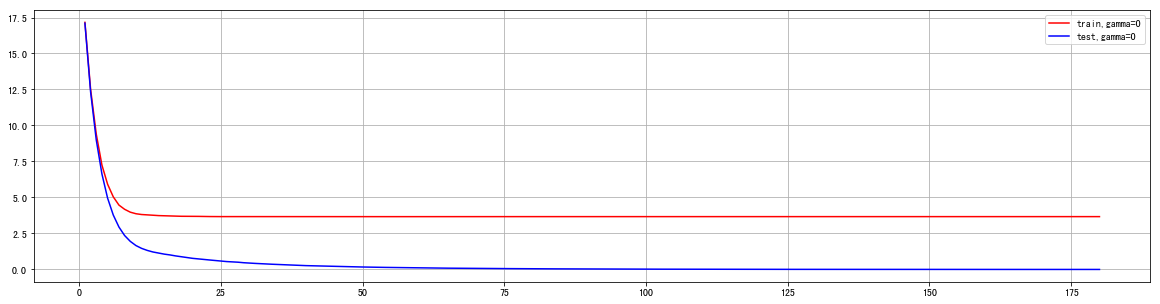

In [44]:
import xgboost as xgb
dfull = xgb.DMatrix(X,y)

param1 = {'silent':True,'objective':'reg:linear','gamma':0}
num_round=180
n_flods=5

time0=time()
cvresult = xgb.cv(param1,dfull,num_round,n_flods)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
cvresult

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult.iloc[:,0],c='r',label='train,gamma=0')
plt.plot(range(1,181),cvresult.iloc[:,2],c='b',label='test,gamma=0')
plt.legend()
plt.show()

xgb.cv自带的关于回归和分类的评估指标
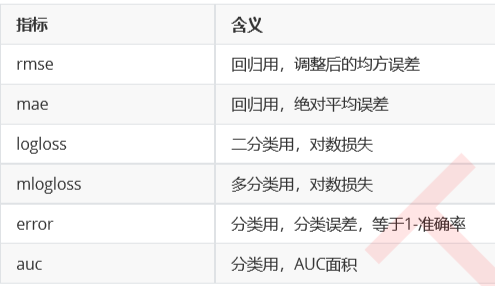


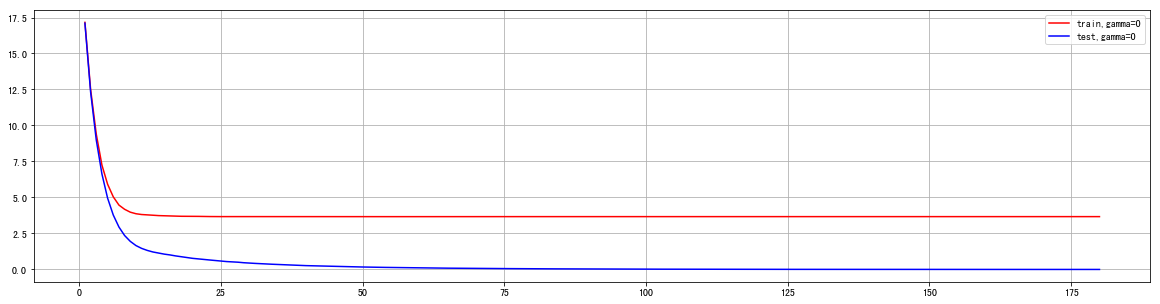

In [45]:
param1 = {'silent':True,'obj':'reg:linear','gamma':0,'eval-metric':'mae'}
cvresult = xgb.cv(param1,dfull,num_round,n_flods)

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult.iloc[:,0],c='r',label='train,gamma=0')
plt.plot(range(1,181),cvresult.iloc[:,2],c='b',label='test,gamma=0')
plt.legend()
plt.show()

00:02:205148
00:02:230798


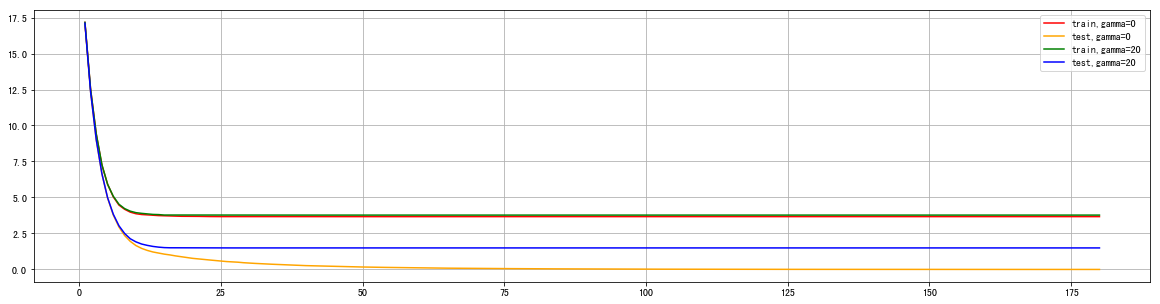

In [54]:
param1 = {'silent':True,'obj':'reg:linear',"gamma":0}
param2 = {'silent':True,'obj':'reg:linear',"gamma":20}
num_round = 180
n_fold = 5

time0 = time()
cvresult1 = xgb.cv(param1,dfull,num_round,n_flods,)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cvresult2 = xgb.cv(param2,dfull,num_round,n_flods)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

#cvresult1.info()
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,181),cvresult2.iloc[:,0],c="green",label="train,gamma=20")
plt.plot(range(1,181),cvresult2.iloc[:,2],c="blue",label="test,gamma=20")
plt.legend()
plt.show()

00:00:765130
00:01:028014


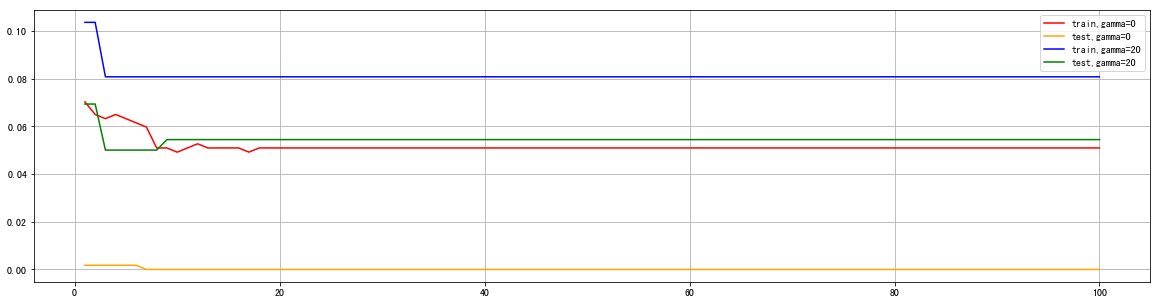

In [57]:
from sklearn.datasets import load_breast_cancer
data2 = load_breast_cancer()
X2 = data2.data
y2 = data2.target

dfull2 = xgb.DMatrix(X2,y2)

param1 = {'silent':True,'obj':'binary:logistic',"gamma":0,'nflod':5}
param2 = {'silent':True,'obj':'binary:logistic',"gamma":20,'nflod':5}
num_round = 100

time0 = time()
cvresult1 = xgb.cv(param1,dfull2,num_round,metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cvresult2 = xgb.cv(param2,dfull2,num_round,metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c='r',label='train,gamma=0')
plt.plot(range(1,101),cvresult1.iloc[:,2],c='orange',label='test,gamma=0')
plt.plot(range(1,101),cvresult2.iloc[:,0],c='b',label='train,gamma=20')
plt.plot(range(1,101),cvresult2.iloc[:,2],c='g',label='test,gamma=20')
plt.legend()
plt.show()

# 剪枝参数
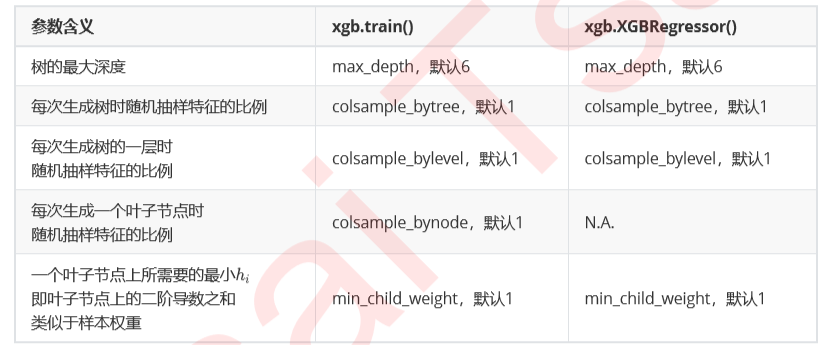
这些参数中，树的大深度是决策树中的剪枝法宝，算是常用的剪枝参数，gamma和最大深度相互影响，一般只用一个。

通常当我们获得了一个数据集后，我们先使用网格搜索找出比较合适的n_estimators和eta组合，然后使用gamma或 者max_depth观察模型处于什么样的状态（过拟合还是欠拟合，处于方差-偏差图像的左边还是右边？），后再决定是否要进行剪枝。

我建议的剪枝上的调参顺序是： n_estimators与eta共同调节，gamma或者max_depth，采样和抽样参数（纵向抽样影响更大），后才是正则化 的两个参数。当然，可以根据自己的需求来进行调整

00:01:197148
test-rmse-mean     4.251897
test-rmse-std      0.618891
train-rmse-mean    0.860467
train-rmse-std     0.038383
dtype: float64


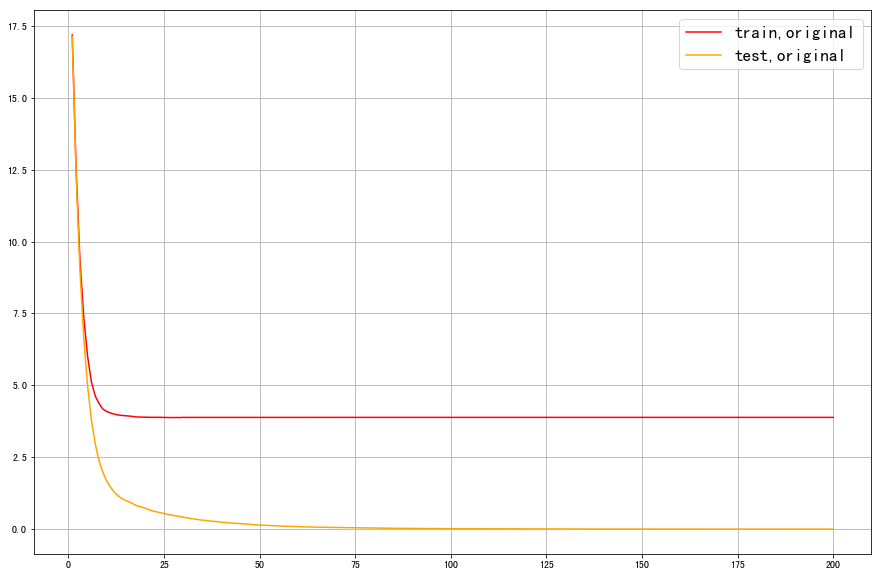

In [67]:
dfull = xgb.DMatrix(X,y)

param1 = {'silen':True,
         'obj':'reg:linear',
         'subsample':1,
         'max_depth':6,
         'eta':0.3,
         'gamma':0,
         'lambda':1,
         'alpha':0,
         'colsample_bytree':1,
         'colsample_bylevel':1,
         'colsample_bynode':1,
         'nflod':5}
num_round = 200

time0 = time()
cvresult1 = xgb.cv(param1,dfull,num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print(cvresult.mean())

fig,ax = plt.subplots(1,figsize=(15,10))
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize='xx-large')
plt.show()


00:01:111323
00:00:874435
00:00:903364


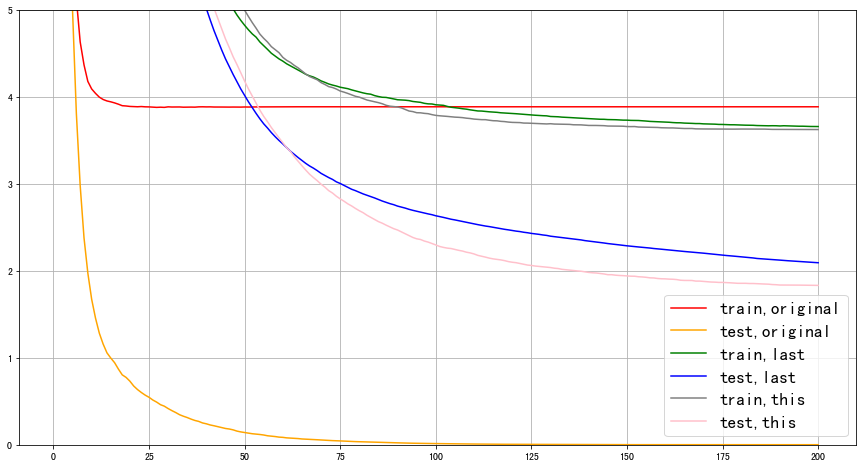

In [68]:
param1 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"nfold":5}
num_round = 200

time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")

param2 = {'silent':True
          ,'obj':'reg:linear'
          ,"max_depth":2
          ,"eta":0.05
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":0.4
          ,"colsample_bynode":1
          ,"nfold":5}

param3 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"eta":0.05
          ,"gamma":20
          ,"lambda":3.5
          ,"alpha":0.2
          ,"max_depth":4
          ,"colsample_bytree":0.4
          ,"colsample_bylevel":0.6
          ,"colsample_bynode":1
          ,"nfold":5}

time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cvresult3 = xgb.cv(param3, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

ax.plot(range(1,201),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,201),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,201),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()

# 样本不均衡处理
scale_pos_weight,通常我们在参数中输入的是负样本量与正样本量之比
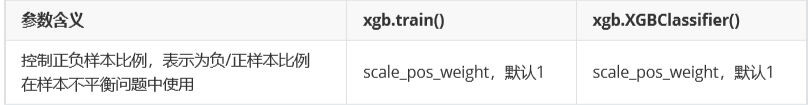

In [71]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix,recall_score,roc_auc_score,roc_curve

class1 = 500
class2 = 50
centers = [[0.0,0.0],[2.0,2.0]]
cluster_std = [1.5,0.5]
X,y = make_blobs(n_samples=[class1,class2],
                centers=centers,
                cluster_std=cluster_std,
                random_state=0,shuffle=False)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=420)
(y == 1 ).sum()/y.shape[0]

0.09090909090909091

In [76]:
clf = XGBClassifier().fit(Xtrain,ytrain)
ypred = clf.predict(Xtest)

clf.score(Xtest,ytest)#0.9272727272727272

confusion_matrix(ytest,ypred,labels=[1,0])#array([[  9,   4],
                                          #       [  8, 144]])

roc_auc_score(ytest,clf.predict_proba(Xtest)[:,1])#0.9671052631578947

0.9671052631578947

In [79]:
clfw = XGBClassifier(scale_pos_weight=10).fit(Xtrain,ytrain)
ypred = clfw.predict(Xtest)

clfw.score(Xtest,ytest)#0.9515151515151515

confusion_matrix(ytest,ypred,labels=[1,0])#array([[ 13,   0],
                                          #       [  8, 144]])

roc_auc_score(ytest,clfw.predict_proba(Xtest)[:,1])#0.9696356275303644


0.9696356275303644

In [81]:
for i in [1,5,10,20,30]:
    clf_ = XGBClassifier(scale_pos_weight=i).fit(Xtrain,ytrain)
    ypred_ = clf_.predict(Xtest)
    print(i)
    print("\tAccuracy:{}".format(clf_.score(Xtest,ytest)))
    print("\tRecall:{}".format(recall_score(ytest,ypred_)))
    print("\tAUC:{}".format(roc_auc_score(ytest,clf_.predict_proba(Xtest)[:,1])))


1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9671052631578947
5
	Accuracy:0.9454545454545454
	Recall:0.9230769230769231
	AUC:0.9665991902834008
10
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9696356275303644
20
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9706477732793523
30
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9701417004048584


In [87]:
dtrain = xgb.DMatrix(Xtrain,ytrain)
dtest = xgb.DMatrix(Xtest,ytest)
dfull = xgb.DMatrix(X,y)

param = {'silent':True,'obj':'binary:logistic','eta':0.1,'scale_pos_weight':1}
num_round = 100
bst = xgb.XGBClassifier(param,dtrain,num_round)
preds = bst.predict(dtest)

ypreds = preds.copy()
ypred[preds >0.5] == 1
ypred[preds != 1] == 0
scale_pos_weight = [1,5,10]
#for i in scale_pos_weight:
#    param = ['silent':True,'obj':'binary:logistic','eta':0.1,'scale_pos_weight':i]
#    clf = xgb.XGBClassifier(param,dtrain,num_round)
    

TypeError: can not initialize DMatrix from DMatrix